In [1]:
import numpy as nu
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
titanic = sns.load_dataset("titanic")
df = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex', 'embarked', 'survived']].copy()
df = df[df['survived'].notna()].reset_index(drop=True)
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)
X = df.drop('survived', axis=1)
y = df['survived']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)


In [12]:
clf = DecisionTreeClassifier(random_state=42, max_depth=4, min_samples_leaf=5)
clf.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [13]:
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1 Score :", f1)
print("\nConfusion Matrix:\n", cm)


Accuracy : 0.776536312849162
Precision: 0.8085106382978723
Recall   : 0.5507246376811594
F1 Score : 0.6551724137931034

Confusion Matrix:
 [[101   9]
 [ 31  38]]


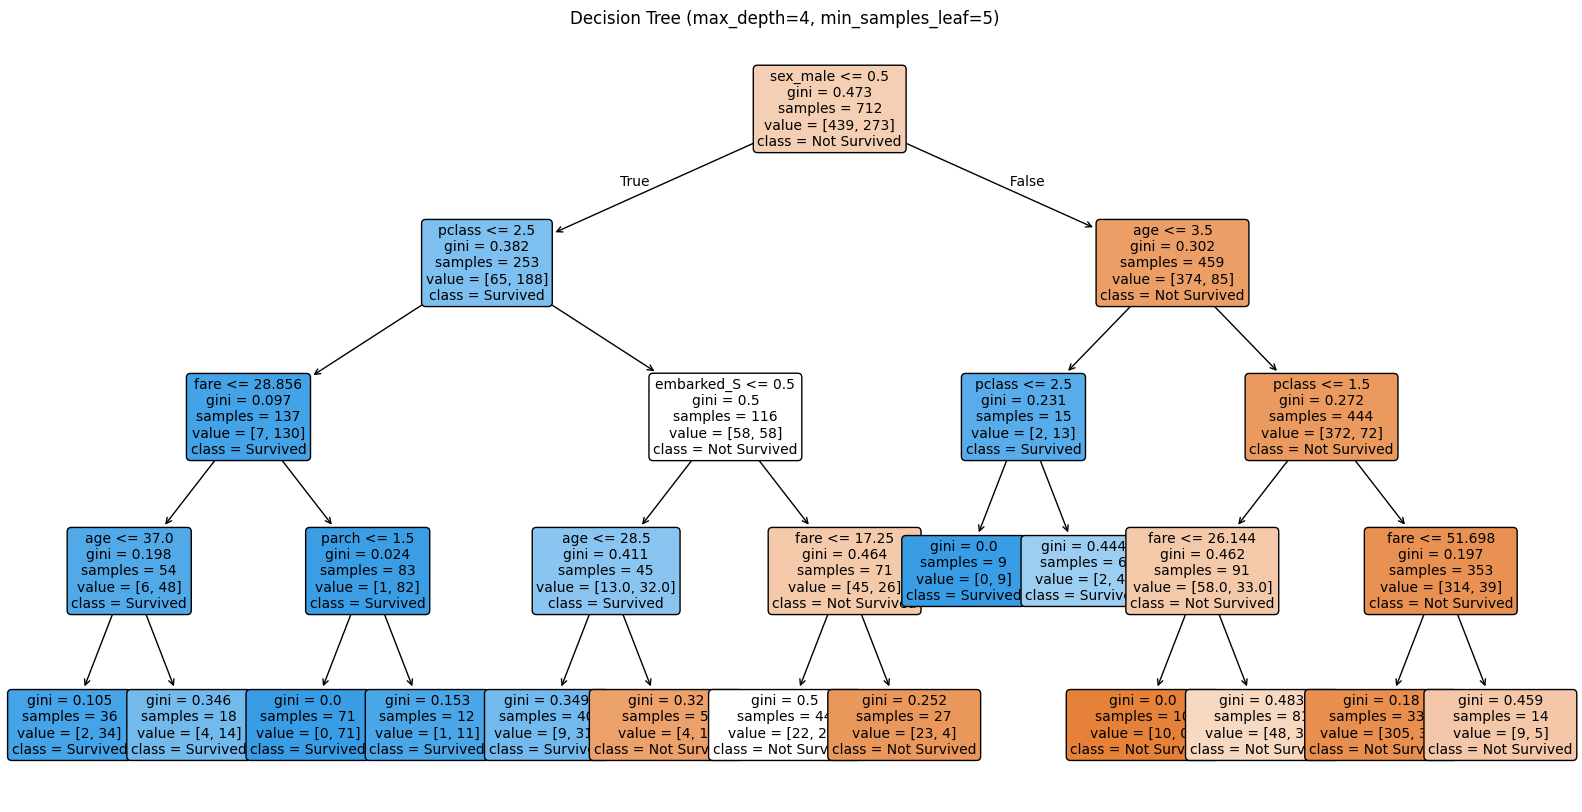

In [17]:
plt.figure(figsize=(20,10))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['Not Survived','Survived'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree (max_depth=4, min_samples_leaf=5)")
plt.show()


In [19]:
print(export_text(clf, feature_names=list(X.columns)))



|--- sex_male <= 0.50
|   |--- pclass <= 2.50
|   |   |--- fare <= 28.86
|   |   |   |--- age <= 37.00
|   |   |   |   |--- class: 1
|   |   |   |--- age >  37.00
|   |   |   |   |--- class: 1
|   |   |--- fare >  28.86
|   |   |   |--- parch <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- parch >  1.50
|   |   |   |   |--- class: 1
|   |--- pclass >  2.50
|   |   |--- embarked_S <= 0.50
|   |   |   |--- age <= 28.50
|   |   |   |   |--- class: 1
|   |   |   |--- age >  28.50
|   |   |   |   |--- class: 0
|   |   |--- embarked_S >  0.50
|   |   |   |--- fare <= 17.25
|   |   |   |   |--- class: 0
|   |   |   |--- fare >  17.25
|   |   |   |   |--- class: 0
|--- sex_male >  0.50
|   |--- age <= 3.50
|   |   |--- pclass <= 2.50
|   |   |   |--- class: 1
|   |   |--- pclass >  2.50
|   |   |   |--- class: 1
|   |--- age >  3.50
|   |   |--- pclass <= 1.50
|   |   |   |--- fare <= 26.14
|   |   |   |   |--- class: 0
|   |   |   |--- fare >  26.14
|   |   |   |   |--- class: 0
|   | 

In [20]:
feat_imp = pd.DataFrame({
    'feature': X.columns,
    'importance': clf.feature_importances_
}).sort_values('importance', ascending=False)

feat_imp


,feature,importance
5,sex_male,0.593517
0,pclass,0.206451
1,age,0.105275
4,fare,0.055615
7,embarked_S,0.038309
3,parch,0.000833
2,sibsp,0.000000
6,embarked_Q,0.000000


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Very deep tree (overfitting likely)
clf_overfit = DecisionTreeClassifier(random_state=42)
clf_overfit.fit(X_train, y_train)

train_acc = accuracy_score(y_train, clf_overfit.predict(X_train))
test_acc  = accuracy_score(y_test,  clf_overfit.predict(X_test))

print("Train Accuracy:", train_acc)
print("Test Accuracy :", test_acc)


Train Accuracy: 0.9817415730337079
Test Accuracy : 0.8212290502793296


In [22]:
depths = range(1, 11)
train_scores = []
test_scores = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)

    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

train_scores, test_scores


([0.7893258426966292,
  0.8047752808988764,
  0.8328651685393258,
  0.8412921348314607,
  0.8651685393258427,
  0.8848314606741573,
  0.8904494382022472,
  0.9143258426966292,
  0.9297752808988764,
  0.9424157303370787],
 [0.776536312849162,
  0.7597765363128491,
  0.7932960893854749,
  0.7877094972067039,
  0.7653631284916201,
  0.7877094972067039,
  0.8044692737430168,
  0.8044692737430168,
  0.8044692737430168,
  0.7988826815642458])

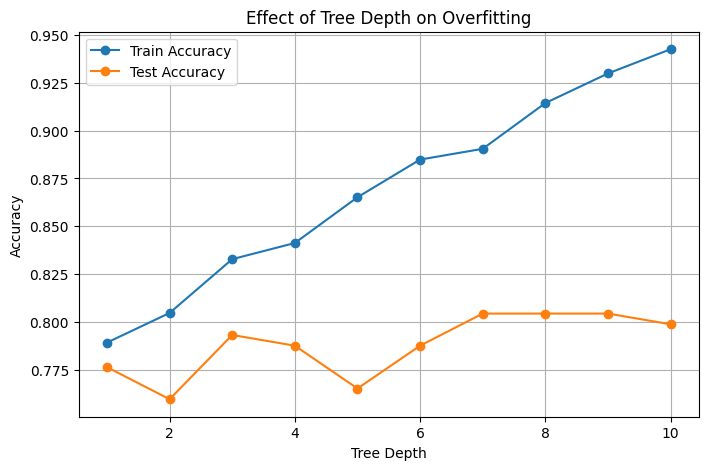

In [26]:
plt.figure(figsize=(8,5))
plt.plot(depths, train_scores, marker='o', label='Train Accuracy')
plt.plot(depths, test_scores, marker='o', label='Test Accuracy')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Effect of Tree Depth on Overfitting")
plt.legend()
plt.grid(True)
plt.show()


In [30]:
DecisionTreeClassifier(min_samples_leaf=4)



,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [31]:
DecisionTreeClassifier(min_samples_split=10)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [32]:
DecisionTreeClassifier(max_leaf_nodes=10)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,10
,min_impurity_decrease,0.0
,class_weight,None


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create model
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    random_state=42
)

# Train model
rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [36]:
y_pred_rf = rf.predict(X_test)

rf_acc  = accuracy_score(y_test, y_pred_rf)
rf_prec = precision_score(y_test, y_pred_rf)
rf_rec  = recall_score(y_test, y_pred_rf)
rf_f1   = f1_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print("----------------------------")
print("Accuracy :", rf_acc)
print("Precision:", rf_prec)
print("Recall   :", rf_rec)
print("F1 Score :", rf_f1)


Random Forest Performance:
----------------------------
Accuracy : 0.7932960893854749
Precision: 0.8076923076923077
Recall   : 0.6086956521739131
F1 Score : 0.6942148760330579


In [37]:
tree_acc = accuracy_score(y_test, y_pred)

print("Model Comparison:")
print("---------------------------")
print("Decision Tree Accuracy :", tree_acc)
print("Random Forest Accuracy :", rf_acc)


Model Comparison:
---------------------------
Decision Tree Accuracy : 0.776536312849162
Random Forest Accuracy : 0.7932960893854749


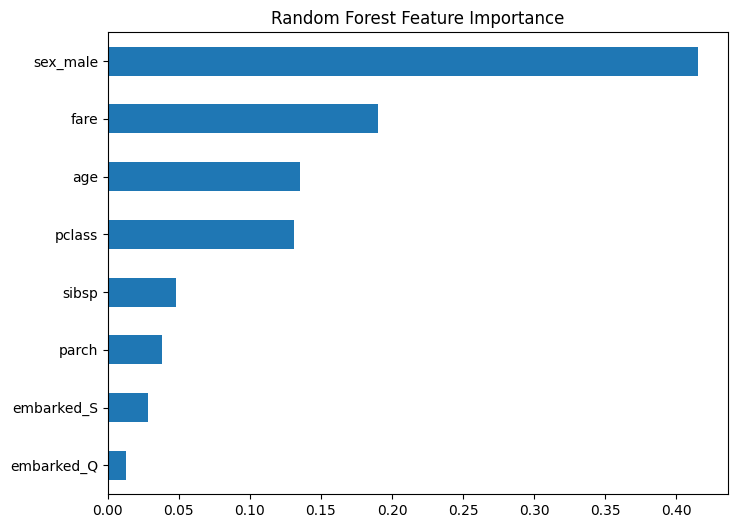

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

feat_imp = pd.Series(rf.feature_importances_, index=X.columns)
feat_imp.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Random Forest Feature Importance")
plt.show()


In [43]:
import pandas as pd

feat_imp = pd.Series(rf.feature_importances_, index=X.columns)
feat_imp.sort_values(ascending=False)


sex_male      0.415685
fare          0.189889
age           0.135491
pclass        0.131311
sibsp         0.048217
parch         0.038106
embarked_S    0.028574
embarked_Q    0.012727
dtype: float64

In [44]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score


In [45]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [46]:
rf_acc_scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')

print("Random Forest CV Accuracy Scores:", rf_acc_scores)
print("Mean Accuracy:", rf_acc_scores.mean())
print("Std Dev     :", rf_acc_scores.std())


Random Forest CV Accuracy Scores: [0.84916201 0.82022472 0.80337079 0.84831461 0.84831461]
Mean Accuracy: 0.8338773460548616
Std Dev     : 0.018801778520317374


In [47]:
rf_prec_scores = cross_val_score(
    rf, X, y, cv=cv,
    scoring=make_scorer(precision_score)
)

print("RF Mean Precision:", rf_prec_scores.mean())


RF Mean Precision: 0.8683062819533408


In [48]:
rf_rec_scores = cross_val_score(
    rf, X, y, cv=cv,
    scoring=make_scorer(recall_score)
)

print("RF Mean Recall:", rf_rec_scores.mean())


RF Mean Recall: 0.6695652173913044


In [49]:
rf_f1_scores = cross_val_score(
    rf, X, y, cv=cv,
    scoring=make_scorer(f1_score)
)

print("RF Mean f1:", rf_f1_scores.mean())


RF Mean f1: 0.7556548779039807


In [51]:
tree_acc_scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')

print("Decision Tree Mean CV Accuracy:", tree_acc_scores.mean())
print("Random Forest  Mean CV Accuracy:", rf_acc_scores.mean())


Decision Tree Mean CV Accuracy: 0.8226539451384094
Random Forest  Mean CV Accuracy: 0.8338773460548616


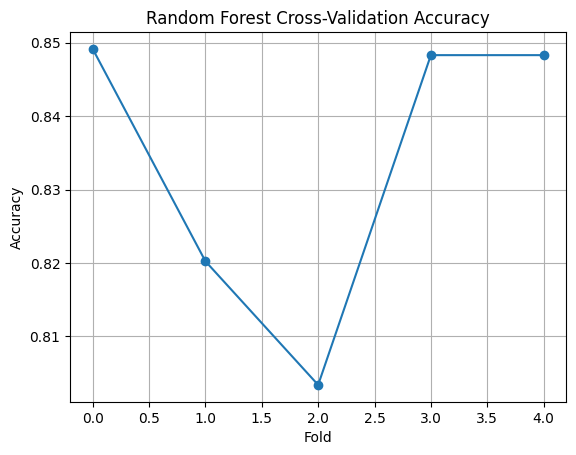

In [53]:
plt.plot(rf_acc_scores, marker='o')
plt.title("Random Forest Cross-Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Fold")
plt.grid(True)
plt.show()
